# Analítica de datos
# Examen parcial 1
# 2019-01
# <font color='red'> SEBASTIÁN RESTREPO, A0005815 </font>

El dataset que deben analizar contiene registros de pacientes con síntomas de problemas cardíacos.
Se tienen los datos provenientes bases de datos de enfermedades del corazón, provenientes de diferentes centros médicos:
- Cleveland Clinic Foundation
- Hungarian Institute of Cardiology, Budapest
- University Hospital, Zurich, & University Hospital, Basel, Switzerland 

Los campos del dataset son los siguientes:
1. ciudad: ciudad del paciente (Cleveland, Hungria, Suiza)
2. edad: en años
3. sexo: "1"=hombre, "0"=mujer
4. tipo_dolor: tipo de dolor de pecho ("1"=angina típico, "2"=angina atípico, "3"=dolor no de angina, "4"=sin síntoma de dolor)
5. presion: presión de la sangre en reposo (en mm/Hg, en el momento de admisión al hospital)
6. colesterol: en densidad del colesterol (en mg/dl)
7. azucar: indica si el nivel de azucar en la sangre en ayunas es superior a 120 mg/dl ("1") o no ("0")
8. ecg: resultado el electro cardiograma ("0"=normal, "1"=anormalidad del nivel de ST, "2"=hipertrofía ventricular probable)
9. pulso: frecuencia cardiaca máxima alcanzada
10. angina: si se induce a una angina a través del ejercicio ("1") o no ("0")
11. st: diferencia relativa entre el nivel de ST inducido por el ejercicio comparado con el nivel del reposo.
12. pendiente: la pendiente de llegada al máximo del nivel ST durante el ejercicio ("1"creciente, "2"=plana, "3"=decreciente)
13. venas: número de venas coloreadas a partir de la fluorescopia (0 a 3)
14. thal: tipo de defecto (valores aceptados 3=normal, 4=defecto arreglado, 7=defecto reversible)
15. target: indica si en efecto el paciente presenta una enfermedad cardiaca ("1", "2", "3", "4") o no ("0")

La idea es poder predecir, utilizando dos tipos de modelo de aprendizaje supervisado (KNN y NaiveBayes) y las variables independientes disponibles qué pacientes pueden presentar mayor o menor riesgo de tener una enfermedad cardiaca. Vamos entonces a considerar como categoría positiva los valores "1", "2", "3" y "4" de la variable *target*, y como categoría negativa su valor "0".

# 1. Entendimiento de los datos, limpieza

El archivo "DatosCorazon.csv" contiene el dataset que tienen que analizar.
Se recomienda abrirlo primero en un lector de archivos planos para entender preliminarmente su formato y así poderlo cargar adecuadamente con Python.

Teniendo en cuenta el tipo de problema en cuestión (clasificación o regresión), realice un análisis exploratorio de los datos estableciendo el baseline, verificando la calidad de los datos (tipos de las variables, valores inválidos, excepciones, valores faltantes, etc.), utilizando gráficos para poder entender las distribuciones de los datos e identificar posibles problemas.

## Puntos a desarrollar

1. <font color='red'>Carguen el archivo en memoria y exploren los datos. Antes de hacer limpieza identifiquen las proporciones de los datos provenientes de cada centro médico (ciudad), el baseline global (0.3) y los baselines por ciudad (0.3), y el baseline global . No olviden las convenciones de la variable objetiva definidas con respecto a como se define la clase positiva. 
   ¿Cree que es una buena idea diagnosticar a un paciente de Cleveland utilizando un modelo entrenado con todos los datos disponibles de las 3 ciudades? (0.2).</font>

1. <font color='red'>Identifiquen los problemas e inconsistencias que tienen los datos, teniendo en cuenta el diccionario de datos y el contexto del problema. Limpien los datos, argumentando las razones de cada transformación o eliminación de datos.
(1.5)</font>

Tenga en cuenta lo siguiente: 
- para modificar ciertos valores de un dataframe, se utiliza "df.replace('oldvalue', 'newvalue')", si se trata de un valor NaN, se utiliza *np.nan* (ya sea el oldvalue o el newvalue)
- para cambiar un tipo de dato a numérico en una estructura de pandas, se utiliza su método ".astype('float64')"
- para negar una condición en python se utiliza el símbolo "~"
- para obtener una tabla de frecuencias de los registros (filas) con respecto al valor de una variable categórica se utiliza "pd.crosstab(index=df['var'], columns="conteo")
- para cambiar los valores de una columna en un dataframe con condiciones, utilizar "df.loc[condicion, 'columna']=newVal"
- cuando haya atributos con demasiados valores faltantes, pueden eliminar la columna correspondiente.
- cuando haya atributos con unos pocos valores faltantes, pueden eliminar los registros correspondientes.
- cuando el número de valores faltantes de un atributo no sea tan elevado, pero si sea considerable, pueden reemplazar los valores faltantes:
  - Si se trata de una variable categórica, pueden crear un nuevo valor, o reemplazar por la categoría más común
  - Si se trata de una variable numérica, pueden reemplazar por el promedio de los valores presentes del atributo

# 1.1 Carga y baselines pre-limpieza de datos

In [199]:
import numpy as np #operaciones matriciales y con vectores
import pandas as pd #tratamiento de datos
import matplotlib.pyplot as plt #gráficos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split #metodo de particionamiento de datasets para evaluación
from sklearn.model_selection import cross_val_score #protocolo de evaluación
from sklearn import datasets, metrics
from sklearn import preprocessing 
import seaborn as sns

In [200]:
data = pd.read_csv('DatosCorazon.csv', sep=";")
data.head()

,ciudad,edad,sexo,tipo_dolor,presion,colesterol,azucar,ecg,pulso,angina,st,pendiente,venas,thal,target
0,Cleveland,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0,6,0
1,Cleveland,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3,3,2
2,Cleveland,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2,7,1
3,Cleveland,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0,3,0
4,Cleveland,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0,3,0


In [201]:
data.dtypes

ciudad         object
edad          float64
sexo            int64
tipo_dolor      int64
presion        object
colesterol     object
azucar         object
ecg            object
pulso          object
angina         object
st             object
pendiente      object
venas          object
thal           object
target          int64
dtype: object

In [202]:
data.describe(include="all")

,ciudad,edad,sexo,tipo_dolor,presion,colesterol,azucar,ecg,pulso,angina,st,pendiente,venas,thal,target
count,720,720.000000,720.000000,720.000000,720,720,720,720,720,720,720,720,720,720,720.000000
unique,3,NaN,NaN,NaN,86,307,3,4,188,3,61,6,6,6,NaN
top,Cleveland,NaN,NaN,NaN,120,0,0,0,150,0,0,2,?,?,NaN
freq,303,NaN,NaN,NaN,78,123,567,471,32,476,330,290,413,320,NaN
mean,NaN,51.888889,0.738889,3.179167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.850000
std,NaN,9.193720,0.439546,0.953646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.076878
min,NaN,28.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,45.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,53.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000
75%,NaN,58.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [203]:
print("Numero de datos de Cleveland")
data[data.ciudad == "Cleveland"].aggregate("count")

Numero de datos de Cleveland


ciudad        303
edad          303
sexo          303
tipo_dolor    303
presion       303
colesterol    303
azucar        303
ecg           303
pulso         303
angina        303
st            303
pendiente     303
venas         303
thal          303
target        303
dtype: int64

In [204]:
print("Numero de datos de Hungria")
data[data.ciudad == "Hungria"].aggregate("count")

Numero de datos de Hungria


ciudad        294
edad          294
sexo          294
tipo_dolor    294
presion       294
colesterol    294
azucar        294
ecg           294
pulso         294
angina        294
st            294
pendiente     294
venas         294
thal          294
target        294
dtype: int64

In [205]:
print("Numero de datos de Suiza")
data[data.ciudad == "Suiza"].aggregate("count")

Numero de datos de Suiza


ciudad        123
edad          123
sexo          123
tipo_dolor    123
presion       123
colesterol    123
azucar        123
ecg           123
pulso         123
angina        123
st            123
pendiente     123
venas         123
thal          123
target        123
dtype: int64

In [206]:
303+294+123

720

La variable dependiente "target" aparece de tipo entero. Hay que cambiarla a caracter, para que sea categórica, ya que este se trata de un problema de clasificación.

In [207]:
data.target = data.target.astype(str)
data.dtypes

ciudad         object
edad          float64
sexo            int64
tipo_dolor      int64
presion        object
colesterol     object
azucar         object
ecg            object
pulso          object
angina         object
st             object
pendiente      object
venas          object
thal           object
target         object
dtype: object

Debido a que se tomarán como categoría negativa el valor "0" y como categoría positiva los valores "1", "2", "3" y "4" de la variable target, los valores positivos se reemplazarán todos por 1.

In [208]:
data.target = data.target.replace('2', '1')

In [209]:
data.target = data.target.replace('3', '1')

In [210]:
data.target = data.target.replace('4', '1')

In [211]:
data.target

0      0
1      1
2      1
3      0
4      0
5      0
6      1
7      0
8      1
9      1
10     0
11     0
12     1
13     0
14     0
15     0
16     1
17     0
18     0
19     0
20     0
21     0
22     1
23     1
24     1
25     0
26     0
27     0
28     0
29     1
      ..
690    1
691    1
692    1
693    1
694    1
695    1
696    1
697    1
698    1
699    1
700    1
701    1
702    1
703    1
704    1
705    1
706    0
707    1
708    1
709    1
710    1
711    1
712    1
713    1
714    1
715    1
716    1
717    0
718    1
719    1
Name: target, Length: 720, dtype: object

## Baseline Global

#### CONTEO

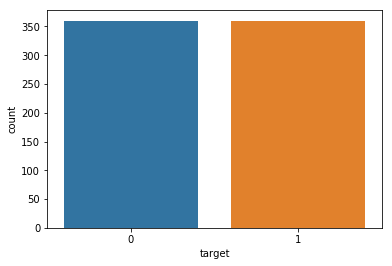

In [212]:
ax = sns.countplot(x="target", data=data)

In [213]:
data.target[data.target=="0"].aggregate('count')

360

In [214]:
data.target[data.target=="0"].aggregate('count')

360

In [215]:
data[data.target=="0"].aggregate('mean')

edad          49.658333
sexo           0.608333
tipo_dolor     2.705556
dtype: float64

In [216]:
data.shape[0]

720

In [217]:
data.target[data.target=="0"].aggregate('count') / data.shape[0] * 100

50.0

El baseline global clasifica a todos los registros en "No presenta una enfermedad cardíaca", con una exactitud de 50.0%

## Baseline Cleveland

#### CONTEO

In [218]:
dataCleveland = data.loc[data.ciudad == "Cleveland"]

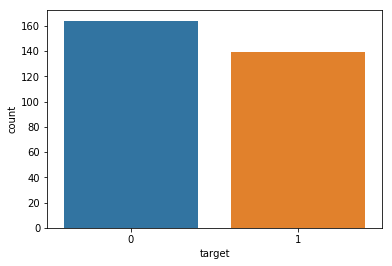

In [219]:
ax = sns.countplot(x="target", data=dataCleveland)

In [220]:
dataCleveland.target[dataCleveland.target=="0"].aggregate('count')

164

In [221]:
dataCleveland[dataCleveland.target=="0"].aggregate('mean')

edad          52.585366
sexo           0.560976
tipo_dolor     2.792683
dtype: float64

In [222]:
dataCleveland.shape[0]

303

In [223]:
dataCleveland.target[dataCleveland.target=="0"].aggregate('count') / data.shape[0] * 100

22.77777777777778

El baseline de Cleveland clasifica a todos los registros en "No presenta una enfermedad cardíaca", con una exactitud de 22.8%

## Baseline Hungria

#### CONTEO

In [224]:
dataHungria = data.loc[data.ciudad == "Hungria"]

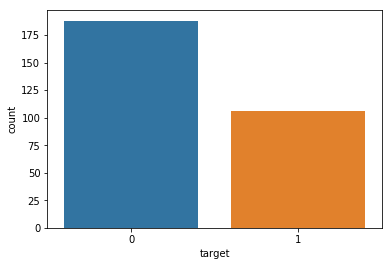

In [225]:
ax = sns.countplot(x="target", data=dataHungria)

In [226]:
dataHungria.target[dataHungria.target=="0"].aggregate('count')

188

In [227]:
dataHungria[dataHungria.target=="0"].aggregate('mean')

edad          46.893617
sexo           0.632979
tipo_dolor     2.617021
dtype: float64

In [228]:
dataHungria.shape[0]

294

In [229]:
dataHungria.target[dataHungria.target=="0"].aggregate('count') / data.shape[0] * 100

26.111111111111114

El baseline de Hungria clasifica a todos los registros en "No presenta una enfermedad cardíaca", con una exactitud de 26.1%

## Baseline Suiza

#### CONTEO

In [230]:
dataSuiza = data.loc[data.ciudad == "Suiza"]

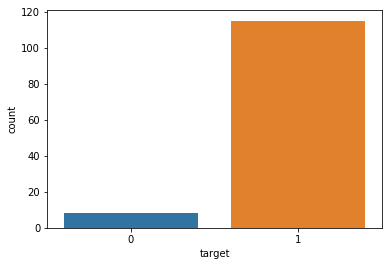

In [231]:
ax = sns.countplot(x="target", data=dataSuiza)

In [232]:
dataSuiza.target[dataSuiza.target=="1"].aggregate('count')

115

In [233]:
dataSuiza[dataSuiza.target=="1"].aggregate('mean')

edad          55.365217
sexo           0.913043
tipo_dolor     3.747826
dtype: float64

In [234]:
dataSuiza.shape[0]

123

In [235]:
dataSuiza.target[dataSuiza.target=="1"].aggregate('count') / data.shape[0] * 100

15.972222222222221

El baseline de Cleveland clasifica a todos los registros en "No presenta una enfermedad cardíaca", con una exactitud de 15.9%

## ¿Cree que es una buena idea diagnosticar a un paciente de Cleveland utilizando un modelo entrenado con todos los datos disponibles de las 3 ciudades?

R/

## 1.2 Análisis y solución de los problemas de calidad de datos

In [236]:
data.head(10)

,ciudad,edad,sexo,tipo_dolor,presion,colesterol,azucar,ecg,pulso,angina,st,pendiente,venas,thal,target
0,Cleveland,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0,6,0
1,Cleveland,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3,3,1
2,Cleveland,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2,7,1
3,Cleveland,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0,3,0
4,Cleveland,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0,3,0
5,Cleveland,56.0,1,2,120.0,236.0,0,0,178.0,0,0.8,1,0,3,0
6,Cleveland,62.0,0,4,140.0,268.0,0,2,160.0,0,3.6,3,2,3,1
7,Cleveland,57.0,0,4,120.0,354.0,0,0,163.0,1,0.6,1,0,3,0
8,Cleveland,63.0,1,4,130.0,254.0,0,2,147.0,0,1.4,2,1,7,1
9,Cleveland,53.0,1,4,140.0,203.0,1,2,155.0,1,3.1,3,0,7,1


In [237]:
data.dtypes

ciudad         object
edad          float64
sexo            int64
tipo_dolor      int64
presion        object
colesterol     object
azucar         object
ecg            object
pulso          object
angina         object
st             object
pendiente      object
venas          object
thal           object
target         object
dtype: object

In [238]:
data.describe(include="all")

,ciudad,edad,sexo,tipo_dolor,presion,colesterol,azucar,ecg,pulso,angina,st,pendiente,venas,thal,target
count,720,720.000000,720.000000,720.000000,720,720,720,720,720,720,720,720,720,720,720
unique,3,NaN,NaN,NaN,86,307,3,4,188,3,61,6,6,6,2
top,Cleveland,NaN,NaN,NaN,120,0,0,0,150,0,0,2,?,?,1
freq,303,NaN,NaN,NaN,78,123,567,471,32,476,330,290,413,320,360
mean,NaN,51.888889,0.738889,3.179167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,9.193720,0.439546,0.953646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,28.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,45.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,53.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,58.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Presión debería ser un valor númerico, pero los valores '?' lo impiden

In [239]:
data[data.presion == '?']

,ciudad,edad,sexo,tipo_dolor,presion,colesterol,azucar,ecg,pulso,angina,st,pendiente,venas,thal,target
393,Hungria,48.0,0,2,?,308,0,1,?,?,2,1,?,?,0
599,Suiza,35.0,1,4,?,0,?,0,130,1,?,?,?,7,1
714,Suiza,69.0,1,4,?,0,0,1,?,?,?,?,?,7,1


Como son solo tres '?' en presión, pueden removerse las filas que los contienen

In [240]:
data = data.replace('?', np.nan)

In [241]:
data[data.presion.isna()]

,ciudad,edad,sexo,tipo_dolor,presion,colesterol,azucar,ecg,pulso,angina,st,pendiente,venas,thal,target
393,Hungria,48.0,0,2,NaN,308,0,1,NaN,NaN,2,1,NaN,NaN,0
599,Suiza,35.0,1,4,NaN,0,NaN,0,130,1,NaN,NaN,NaN,7,1
714,Suiza,69.0,1,4,NaN,0,0,1,NaN,NaN,NaN,NaN,NaN,7,1


In [244]:
data = data.dropna(subset = ['presion'])

In [245]:
data[data.presion.isna()]

,ciudad,edad,sexo,tipo_dolor,presion,colesterol,azucar,ecg,pulso,angina,st,pendiente,venas,thal,target


In [246]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717 entries, 0 to 719
Data columns (total 15 columns):
ciudad        717 non-null object
edad          717 non-null float64
sexo          717 non-null int64
tipo_dolor    717 non-null int64
presion       717 non-null object
colesterol    694 non-null object
azucar        635 non-null object
ecg           715 non-null object
pulso         717 non-null object
angina        717 non-null object
st            713 non-null object
pendiente     512 non-null object
venas         307 non-null object
thal          398 non-null object
target        717 non-null object
dtypes: float64(1), int64(2), object(12)
memory usage: 89.6+ KB


Ahora sí puedo convertir presión en un float

In [195]:
data.presion = data.presion.astype(float)
data.dtypes

ciudad         object
edad          float64
sexo            int64
tipo_dolor      int64
presion       float64
colesterol     object
azucar         object
ecg            object
pulso          object
angina         object
st             object
pendiente      object
venas          object
thal           object
target         object
dtype: object

Lo mismo debo hacer con las variables colesterol, pulso y st

In [198]:
data.head()

,ciudad,edad,sexo,tipo_dolor,presion,colesterol,azucar,ecg,pulso,angina,st,pendiente,venas,thal,target


# 2. Modelamiento con K-NN y Naïve Bayes

## Puntos a desarrollar:

<font color='red'>Construya y escoja el mejor modelo de diagnóstico posible (buscando los mejores parámetros) utilizando las técnicas KNN y NaïveBayes para un paciente de Cleveland. Básese en la métrica de evaluación del modelo adecuada, utilizando 10-fold cross validation para encontrar los parámetros ideales del modelo</font>

1. <font color='red'> Construcción del mejor modelo en KNN para Cleveland. Solo considere las variables independientes numéricas. (1.0)</font>


2. <font color='red'> Construcción del mejor modelo en NaiveBayes para Cleveland.</font>

2.1. <font color='red'>Para las variables numéricas utilice un GaussianNB, buscando el mejor valor del parámetro var_smoothing entre 0.1 Y 5. (0.6)</font>

2.2. <font color='red'>Para las variables categóricas utilice un BernouilliNB, buscando el mejor valor del parámetro alpha (suavizador de Lapace) entre 1 y 100. (0.8)</font>

2.3. <font color='red'>Concluya sobre la calidad de los modelos y su escogencia. (0.3)</font>

2.4. <font color='red'>**BONUS!!!!!** Construya un modelo que agrupe los dos clasificadores de Naive Bayes. Utilice las probabilidades de predicción de cada clase que se obtienen con el método "modelo.predict_proba(X)" tanto para el modelo de variables numéricas como para el modelo con las variables categóricas y multiplíquelas, prediciendo entonces la clases con mayo verosimilitud (0.5)</font>


Tenga en cuenta lo siguiente: 
- Utilice holdout 70% y 30% para evaluar el modelo final. Particione los datos inicialmente en entrenamiento y test. Utilice un random_state=12345 en el método train_test_split para poder reproducir los resultados.
- Utilice 10-fold cross validation para buscar el mejor valor de los parámetros utilizando solo el set de entrenamiento.
- Una vez que el valor de los parámetros ideal se ha encontrado, evalúe sobre el test set, calculando las métricas correspondientes

## 2.1 Modelo KNN para variables numéricas

....

....

....


## 2.2 Modelo Naïve Bayes para variables numéricas

### Modelo para variables numéricas

....

....


### Modelo para variables categóricas

....

....


### Modelo global

....

....
